c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.025s...
[t-SNE] Computed neighbors for 5000 samples in 0.918s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.092076
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.369713
[t-SNE] KL divergence after 500 iterations: 2.219383


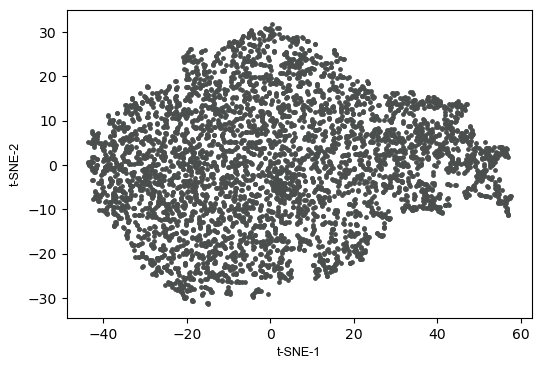

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(-1)}


c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\bioinfokit\visuz.py:1947: UserWarning: Mismatched number of handles and labels: len(handles) = 9 len(labels) = 72
  plt.legend(handles=s.legend_elements()[0], labels=list(unique_class), loc=legendpos,


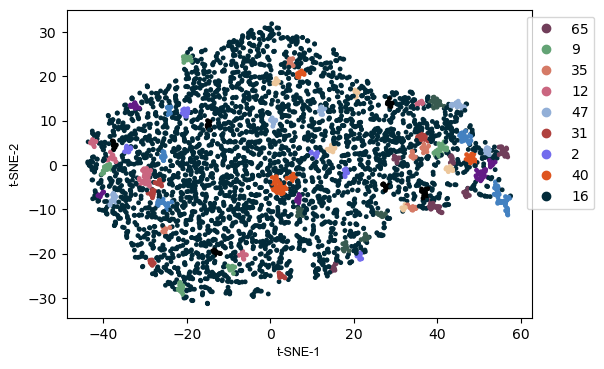

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


cols = ["ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI",
        "NK.27+11b-.BM", "NK.27+11b+.BM", "NK.27-11b+.BM",
        "NK.27+11b-.Sp", "NK.27+11b+.Sp", "NK.27-11b+.Sp"]

data = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", usecols=cols)
data_sampled = data.sample(n=5000, random_state=42)
#Daten standardisieren (z-Score pro OCR):
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)
data_scaled
#PCA
data_scaled.shape
pca = PCA(n_components=25)
pca_scores = PCA().fit_transform(data_scaled)
# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)

# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)
df_pc

# perform t-SNE on PCs scores
# we will use first 50 PCs but this can vary
from sklearn.manifold import TSNE
#tsne_em = TSNE(n_components = 2, perplexity = 30.0, early_exaggeration = 12, 
 #              n_iter = 1000, learning_rate = 368, verbose = 1).fit_transform(df_pc[:,0:49])
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, learning_rate=200, verbose=1)
tsne_result = tsne.fit_transform(df_pc)

###questions so far: is it okay to reduce so radical to a sample of 5000? 
###and how many PCs used?
###and how optimize t-SNE parameters perplexicity and n_iter?
###for visualization: does it look richt??? for eps>3 it is just a big blob, for <3 it is big blob and small dots???
###also what for min_samples
from bioinfokit.visuz import cluster
from sklearn.cluster import DBSCAN
cluster.tsneplot(score=tsne_result, show=True)
get_clusters = DBSCAN(eps = 1, min_samples = 10).fit_predict(tsne_result)
print(set(get_clusters))

cluster.tsneplot(score=tsne_result, colorlist=[str(i) for i in get_clusters], 
    colordot=('#713e5a', '#63a375', '#edc79b', '#d57a66', '#ca6680', '#395B50', '#92AFD7', '#b0413e', '#4381c1', '#736ced', '#631a86', '#de541e', '#022b3a', '#000000'), 
    legendpos='upper right', legendanchor=(1.15, 1), show=True)

# here eps parameter is very important and optimizing eps is essential
# for well defined clusters. I have run DBSCAN with several eps values
# and got good clusters with eps=3
#get_clusters = DBSCAN(eps = 2, min_samples = 10).fit_predict(tsne_result)
# check unique clusters
# -1 value represents noisy points could not assigned to any cluster
#set(get_clusters)
#print(set(get_clusters))
# get t-SNE plot with colors assigned to each cluster
#

